In [1]:
from numpy import random
import numpy as np
import pandas as pd
from random import uniform
import matplotlib.pyplot as plt

from scipy.optimize import dual_annealing
from scipy.optimize import curve_fit

In [2]:
def foo(x):
    return x[0]*x[0] + x[1]*x[1] - 0.5*x[0] - x[1] +np.cos(10*(x[0]-x[1]))

In [3]:
bounds = [(-3, 3), (-3, 3)]


In [4]:
n_trial = 3

In [6]:
x = np.zeros(2)
for i in range(n_trial):
    # Initial value
    x[0] = uniform(-3, 3)
    x[1] = uniform(-3, 3)
    print(x)  # debug
    
    # Dual annealing optimization
    ret = dual_annealing(foo, bounds, x0=x, maxiter=500, seed=19)
    print('x:', ret.x)
    print('f(x):', ret.fun)

[-2.1706263  -0.22205752]
x: [0.21823774 0.53176176]
f(x): -1.3104621726759405
[0.74445593 1.96618664]
x: [0.21823772 0.53176174]
f(x): -1.3104621726759236
[-1.27292366  0.14420857]
x: [0.21823772 0.53176175]
f(x): -1.310462172675924


In [8]:
df = pd.read_csv('dm-end2-5.csv')
print(df.shape)
print(df.info())
display(df.head())

(100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


,x,y
0,6.54,-0.197
1,1.15,0.637
2,9.50,-0.381
3,4.82,-0.311
4,8.72,0.162


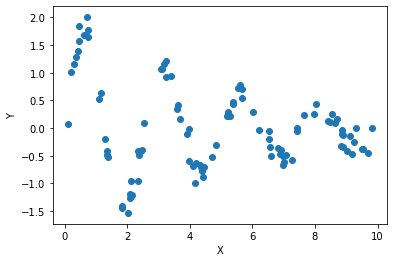

In [9]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [23]:
def f(x, a, b, c):
    tot = a*np.exp(-b*x)*np.sin(c*x)
    return tot

In [24]:
popt, pcov = curve_fit(f, df['x'], df['y'])

In [25]:
print(popt)

[2.04346472 0.20491946 2.49641912]


In [26]:
y_reg = f(df['x'], *popt)  # *var: unpacking of list/tuple var